In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
with open('interval_data_1_1.json') as f:
    data = json.load(f)

In [11]:
steps = []
containers_load_time = []
airplane_80_load_time = []
airplane_140_load_time = []

for k, v in data.items():
    for item in v:
        steps.append(k)
        containers_load_time.append(item[0])
        airplane_80_load_time.append(item[1]['80'])
        if '140' in item[1].keys():
            airplane_140_load_time.append(item[1]['140'])
        else:
            airplane_140_load_time.append([np.nan, np.nan])
        
df = pd.DataFrame({'steps': steps, 'containers_load_time': containers_load_time,
                   'airplane_80_load_time': airplane_80_load_time, 'airplane_140_load_time': airplane_140_load_time})
df['steps'] = df['steps'].astype('int32')
df['airplane_80_load_time'] = df['airplane_80_load_time'].apply(lambda x: x[0])
df['airplane_140_load_time'] = df['airplane_140_load_time'].apply(lambda x: x[0])
df.head(7)

,steps,containers_load_time,airplane_80_load_time,airplane_140_load_time
0,300,60.0,160.0,NaN
1,300,60.0,160.0,NaN
2,300,60.0,160.0,NaN
3,300,60.0,160.0,NaN
4,300,60.0,160.0,NaN
5,300,60.0,160.0,NaN
6,300,60.0,160.0,NaN


In [12]:
df = df.groupby('steps').agg({'containers_load_time': np.mean, 'airplane_80_load_time': np.mean, 'airplane_140_load_time': np.mean}).reset_index(drop=False)
df.head(5)

,steps,containers_load_time,airplane_80_load_time,airplane_140_load_time
0,300,60.0,160.000000,NaN
1,400,89.0,153.800000,380.000000
2,500,113.5,159.707500,393.333333
3,600,135.0,175.350000,384.000000
4,700,155.0,167.183333,416.000000


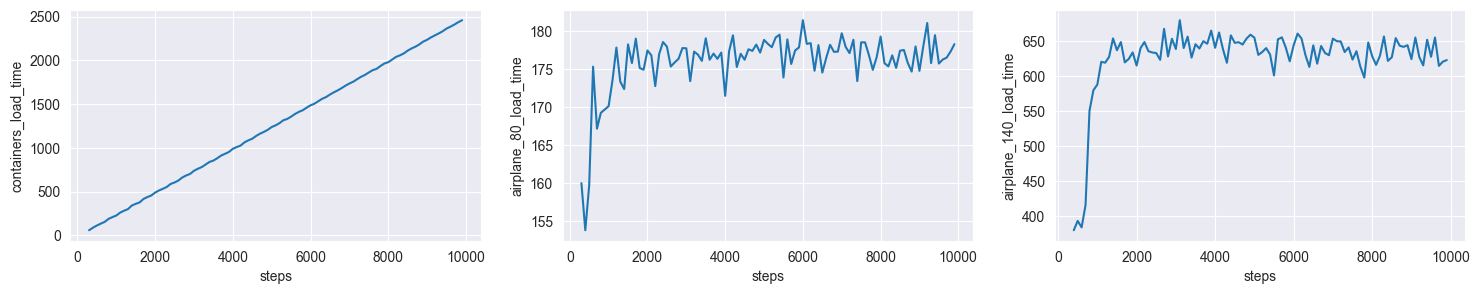

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
sns.lineplot(data=df, x='steps', y='containers_load_time', ax=ax[0])
sns.lineplot(data=df, x='steps', y='airplane_80_load_time', ax=ax[1])
sns.lineplot(data=df, x='steps', y='airplane_140_load_time', ax=ax[2])
plt.show()

In [14]:
df = df.loc[df.steps >= 1500].copy()

In [17]:
df.airplane_140_load_time.mean()

637.8579556363736

In [18]:
df.airplane_140_load_time.std()

15.590770546431004